# Customizing a tensorflow 2 model
## Import the relevant libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

2023-11-29 16:14:48.756000: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Generation

In [3]:
observations=1000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(low=-10,high=10,size=(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-1,1,(observations,1))
generated_targets=2 * xs - 3 * zs + 5 + noise 

# Save into a NPZ file

In [4]:
np.savez("TF5_intro",inputs=generated_inputs,targets=generated_targets)


# Solving with Tensorflow

In [6]:
training_data=np.load('TF5_intro.npz')
input_size=2
output_size=1
model=tf.keras.Sequential([ # Sequential means how many layers do you want
    tf.keras.layers.Dense(output_size, # Dense calculates the dot product of the inputs and the biases (xw+b)
                          # set the initial values for weights and the biases
    kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1))
])
# Define a custom optimizer , where we can specify the learning rate.
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
# compile is thw place where you can select and indicate the optimizers and the loss, default epochhs will be 
model.compile(optimizer=custom_optimizer,loss='mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)


Epoch 1/100
32/32 - 1s - loss: 30.3013 - 503ms/epoch - 16ms/step
Epoch 2/100
32/32 - 0s - loss: 1.2654 - 42ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4141 - 41ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.4328 - 53ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3777 - 38ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3553 - 41ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3634 - 39ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3642 - 44ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3686 - 58ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3623 - 44ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3706 - 46ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3707 - 46ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3862 - 58ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3844 - 92ms/epoch - 3ms/step
Epoch 15/100
32/32 - 0s - loss: 0.4110 - 79ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3599 - 109ms/epoch - 3ms/st

# Extract the weights and the biases

In [7]:
model.layers[0].get_weights()
weights=model.layers[0].get_weights()[0]
biases=model.layers[0].get_weights()[0]

# Extract the output (make predictions)

In [8]:
# Predict
model.predict_on_batch(training_data['inputs']).round(1)


2023-11-29 16:37:34.779999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1000,2]
	 [[{{node Placeholder/_0}}]]


array([[ 20.2],
       [ 17.2],
       [ 20.4],
       [ -1.9],
       [ 37. ],
       [ 36.3],
       [ 31.4],
       [-15.4],
       [ -9.6],
       [ 29.7],
       [ 42.6],
       [ 13.5],
       [-16.1],
       [ 25. ],
       [ 28.3],
       [  3.1],
       [-21.3],
       [  6.2],
       [ -7.2],
       [ 40.6],
       [-10.8],
       [ 15.8],
       [ 18.3],
       [  8. ],
       [-31.6],
       [-29.7],
       [-17.6],
       [ -0.6],
       [-32.1],
       [  1. ],
       [ 30. ],
       [  3.2],
       [ 47.3],
       [ 20.6],
       [ 17.2],
       [ -3. ],
       [ -6. ],
       [-13.8],
       [  2.5],
       [  7.9],
       [ 14.1],
       [ 16.2],
       [ 42.4],
       [ 26.8],
       [  7.2],
       [-37.5],
       [ 43. ],
       [  8.5],
       [-23.9],
       [  5.4],
       [ 32.9],
       [-34.7],
       [ 19.3],
       [-30.6],
       [ 11. ],
       [-29.2],
       [ 36. ],
       [ -1.9],
       [-23.3],
       [-33.9],
       [ 38.5],
       [ 41.1],
       [

# Targets to match with the outputs


In [9]:
training_data['targets'].round(1)

array([[ 20.4],
       [ 17.8],
       [ 20.9],
       [ -3.4],
       [ 36.4],
       [ 35.5],
       [ 30.6],
       [-15.6],
       [ -8.9],
       [ 28.8],
       [ 42.6],
       [ 13.9],
       [-15.9],
       [ 25.7],
       [ 27.3],
       [  3.3],
       [-20.9],
       [  5.9],
       [ -6.2],
       [ 39.2],
       [-12.1],
       [ 15.6],
       [ 19.3],
       [  8.8],
       [-31.9],
       [-29. ],
       [-18.6],
       [ -0.3],
       [-31. ],
       [  0.3],
       [ 30.4],
       [  3.8],
       [ 47.3],
       [ 21.8],
       [ 15.2],
       [ -3.5],
       [ -4.1],
       [-12.4],
       [  3. ],
       [  8.7],
       [ 13.2],
       [ 17.3],
       [ 43.3],
       [ 26.7],
       [  6.9],
       [-36.7],
       [ 43.3],
       [ 10.5],
       [-23.3],
       [  6.5],
       [ 33.6],
       [-33.2],
       [ 19. ],
       [-29.9],
       [ 11.1],
       [-28.3],
       [ 35. ],
       [ -0.5],
       [-23.8],
       [-33.1],
       [ 38.9],
       [ 40.8],
       [

# Plotting the Data

2023-11-29 16:39:57.183881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1000,2]
	 [[{{node Placeholder/_0}}]]


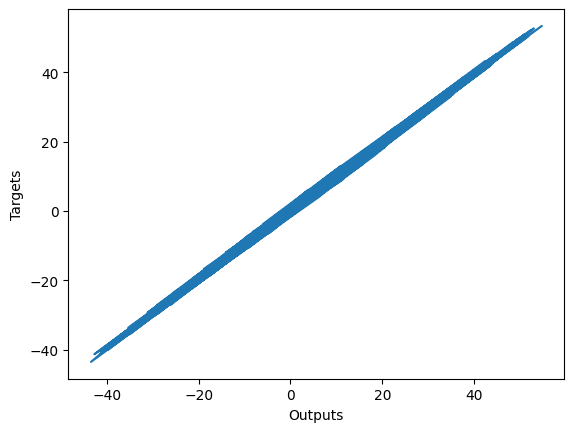

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel("Targets")
plt.show()